In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import thư viện
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import random
import imutils 

In [35]:
def transform(scale = False, rotate = False, path = "", display = True):
    
    img = cv2.imread(path)

    original = img.copy()

    rows,cols  = img.shape[:2]
    
    # Random góc xoay
    angle = np.random.randint(10,180)
    # Giá trị ngẫu nhiên để thay đổi kích thước ảnh
    scale_value = round(np.random.uniform(0.6, 1.3),2)    
        
    # Áp dụng xoay theo góc ngẫu nhiên
    if rotate:
        
        # Tạo ma trận quay
        M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
        
        img = cv2.warpAffine(img,M,(cols,rows), borderMode=1)
        print("Applied rotation of angle: {}".format(angle))

        
    if scale:
        
        # Thay đổi kích thước ảnh
        img = cv2.resize(img, (0,0), fx=scale_value, fy=scale_value)
        print("Image resized to: {}%".format(scale_value*100))

    grayimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    ret,binary = cv2.threshold(grayimg,220, 255, cv2.THRESH_BINARY_INV)  

    contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    
    cnt = contours[0]
    
    if display:
        plt.figure(figsize=[18,18])
        plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image")
        plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("Modified")   
    return cnt, img


In [4]:
def spot_the_difference(path_img1 ='', path_img2 =''):

    img1 = cv2.imread(path_img1)
    img2 = cv2.imread(path_img2)

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    #find the difference
    diff = cv2.absdiff(gray1, gray2)

    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    kernel = np.ones((5,5), np.uint8)
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    contours = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)

    for contour in contours:
        if cv2.contourArea(contour) > 100:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img1, (x, y), (x+w, y+h), (0,0,255), 2)
            cv2.rectangle(img2, (x, y), (x+w, y+h), (0,0,255), 2)
            
    #show final images
    x = np.zeros((img1.shape[0], 10, 3), np.uint8)
    result = np.hstack((img1, x, img2))
    cv2_imshow( result)


In [49]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/drive/MyDrive/ImageProcessing/bird_resize.jpg')

# Create a mask
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
contours,_ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(img.shape[:2],np.uint8)
for cnt in contours:
    cv2.drawContours(mask,[cnt],-1,255,-1)

# Apply the mask
result = cv2.bitwise_and(img,img,mask=mask)

# Save the result
cv2.imwrite('/content/drive/MyDrive/ImageProcessing/bird_remove_background.jpg', result)

True

Image resized to: 85.0%


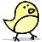

True

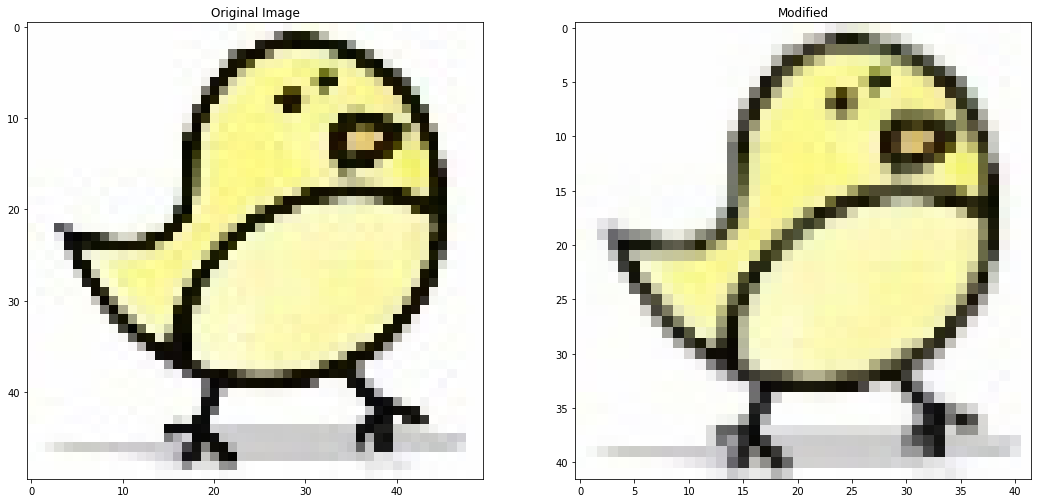

In [51]:
#Modified object - Scale object
trans, img_bird = transform(rotate = False, scale = True,path = '/content/drive/MyDrive/ImageProcessing/bird_remove_background.jpg')
cv2_imshow(img_bird)
cv2.imwrite('/content/drive/MyDrive/ImageProcessing/img_bird_scale.jpg', img_bird)

Applied rotation of angle: 81


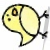

True

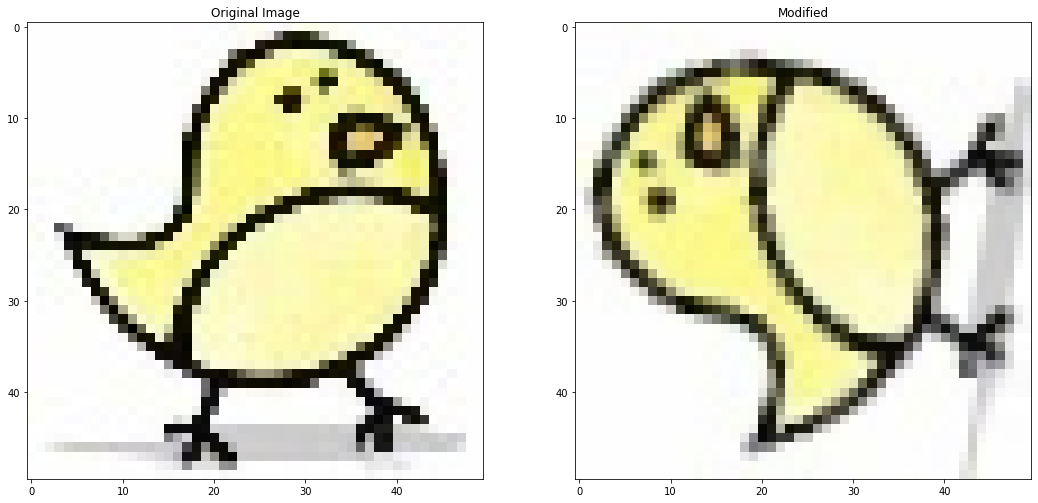

In [52]:
#Modified object - rotate object

trans, img_bird = transform(rotate = True, scale = False,path = '/content/drive/MyDrive/ImageProcessing/bird_remove_background.jpg')
cv2_imshow(img_bird)
cv2.imwrite('/content/drive/MyDrive/ImageProcessing/img_bird_rotate.jpg', img_bird)

Applied rotation of angle: 178
Image resized to: 67.0%


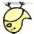

True

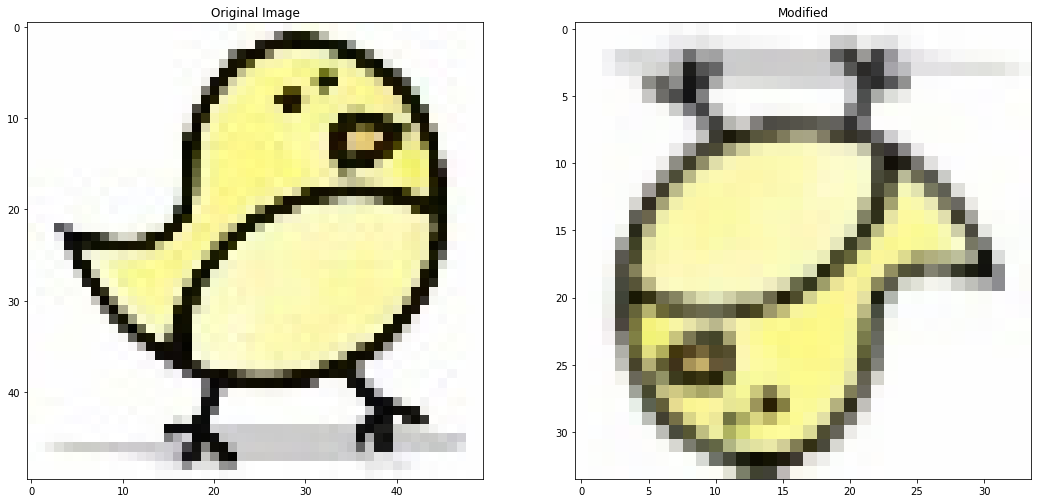

In [53]:
#Modified object - scale and rotate object

trans, img_bird = transform(rotate = True, scale = True,path = '/content/drive/MyDrive/ImageProcessing/bird_remove_background.jpg')
cv2_imshow(img_bird)
cv2.imwrite('/content/drive/MyDrive/ImageProcessing/img_bird_rotate_scale.jpg', img_bird)

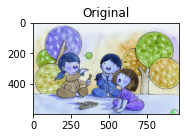

In [55]:
img = cv2.imread('/content/drive/MyDrive/ImageProcessing/hideandseek.jpg')

img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

imgCanny = cv2.Canny(img1, 100, 200)

contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

imgOrigin = img.copy()
cv2.drawContours(imgOrigin, contours, 3, (0,255,0), 3)

plt.figure(figsize = (12,3))
plt.subplot(141), plt.imshow(imgOrigin), plt.title('Original')
plt.xticks(), plt.yticks()
plt.show()

In [56]:
objects_md = []
objects_sm = []
arcs = []
for contour in contours:
    area = cv2.contourArea(contour)
    # Các vật thể kích thước nhỏ
    if 400 < area < 500:
        arc = cv2.arcLength(contour, True)
        # Xét chu vi để tránh các vật thể chứa cạnh kéo dài
        if arc < 400:
            objects_sm.append(contour)
    #Vật thể kích thước trung bình
    if 500 < area < 1000:
        arc = cv2.arcLength(contour, True)
        if arc < 1000:
            objects_md.append(contour)
print(len(objects_md))
print(len(objects_sm))

10
14


In [59]:
img_copy = img.copy()

number_objects = 5
count = 0
#Đổi màu một số vùng bao kín
for object in objects_md:
    count += 1
    bgr = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    cv2.drawContours(img_copy, [object], -1, bgr, -2)
    cv2_imshow(img_copy)
    if count == len(objects_md) - 1:
        cv2.imwrite('/content/drive/MyDrive/ImageProcessing/output_easy.jpg', img_copy)

Output hidden; open in https://colab.research.google.com to view.

In [60]:
#Find the difference
path1 = '/content/drive/MyDrive/ImageProcessing/hideandseek.jpg'
path2 = '/content/drive/MyDrive/ImageProcessing/output_easy.jpg'
spot_the_difference(path1, path2)

Output hidden; open in https://colab.research.google.com to view.

In [69]:
#add objects to image
bird = cv2.imread('/content/drive/MyDrive/ImageProcessing/bird_resize.jpg')
img = cv2.imread('/content/drive/MyDrive/ImageProcessing/hideandseek.jpg')
bird_transform = cv2.imread('/content/drive/MyDrive/ImageProcessing/img_bird_scale.jpg')
bird_scale_rotate = cv2.imread('/content/drive/MyDrive/ImageProcessing/img_bird_rotate_scale.jpg')

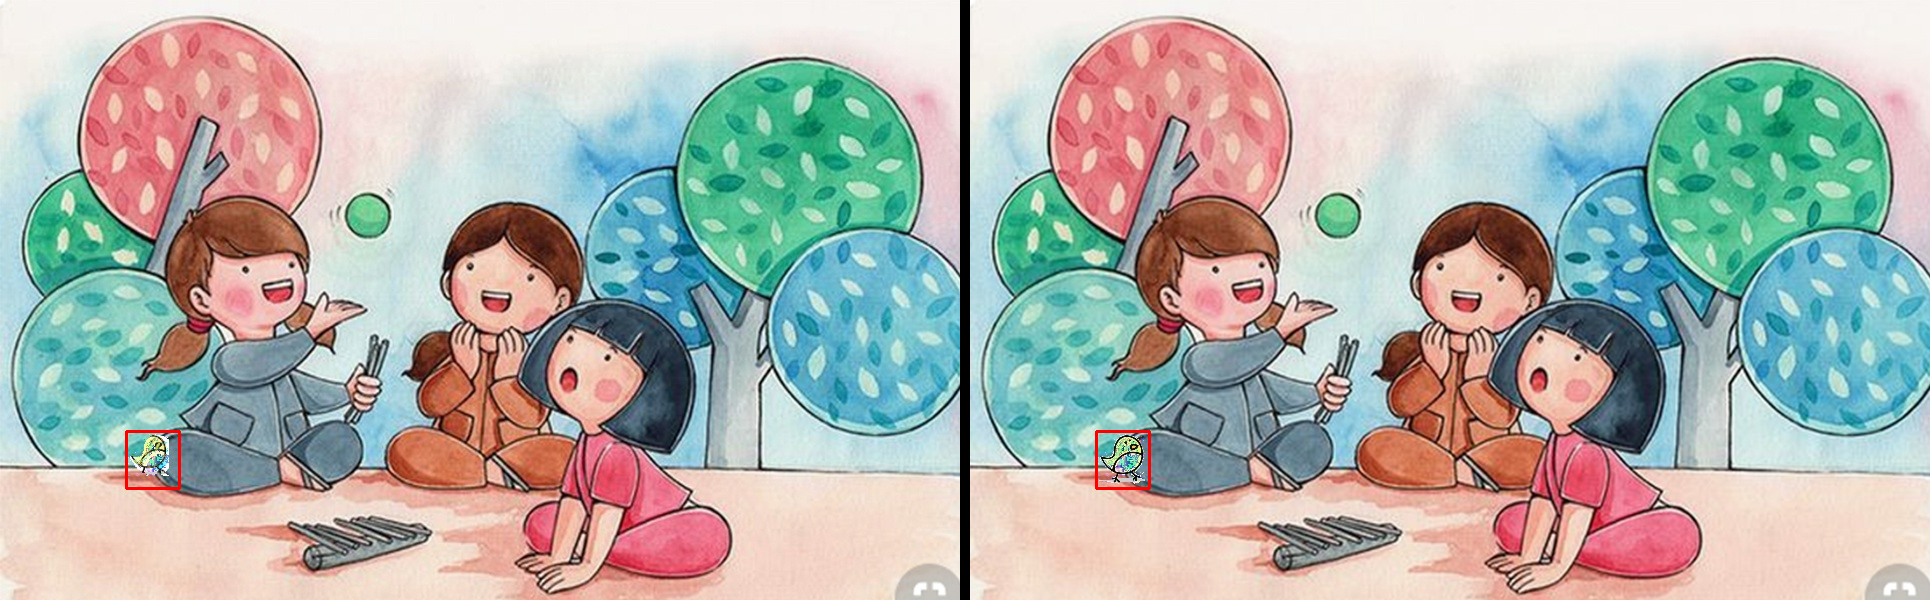

In [72]:
#Có thể  thêm hai vật thể vào cùng vị trí và biến đổi vật thể đi
x = np.random.randint(img.shape[0] - bird.shape[0])
y = np.random.randint(img.shape[1] - bird.shape[1])

img_ori = img.copy()
for channel in range(3):
    for i in range(x, x + bird.shape[0]):
        for j in range(y, y + bird.shape[1]):
            if bird[i-x,j-y,channel] < 250:
                img_ori[i, j, channel] = bird[i-x, j-y, channel]

img_test = img.copy()

for channel in range(3):
    for i in range(x, x + bird_transform.shape[0]):
        for j in range(y, y + bird_transform.shape[1]):
            if bird[i-x,j-y,channel] < 250:
                img_test[i, j, channel] = bird_transform[i-x, j -y, channel]

cv2.imwrite('/content/drive/MyDrive/ImageProcessing/img_output.jpg',img_test)
cv2.imwrite('/content/drive/MyDrive/ImageProcessing/img_original.jpg', img_ori)

path1 = '/content/drive/MyDrive/ImageProcessing/img_output.jpg'
path2 = '/content/drive/MyDrive/ImageProcessing/img_original.jpg'
spot_the_difference(path1, path2)

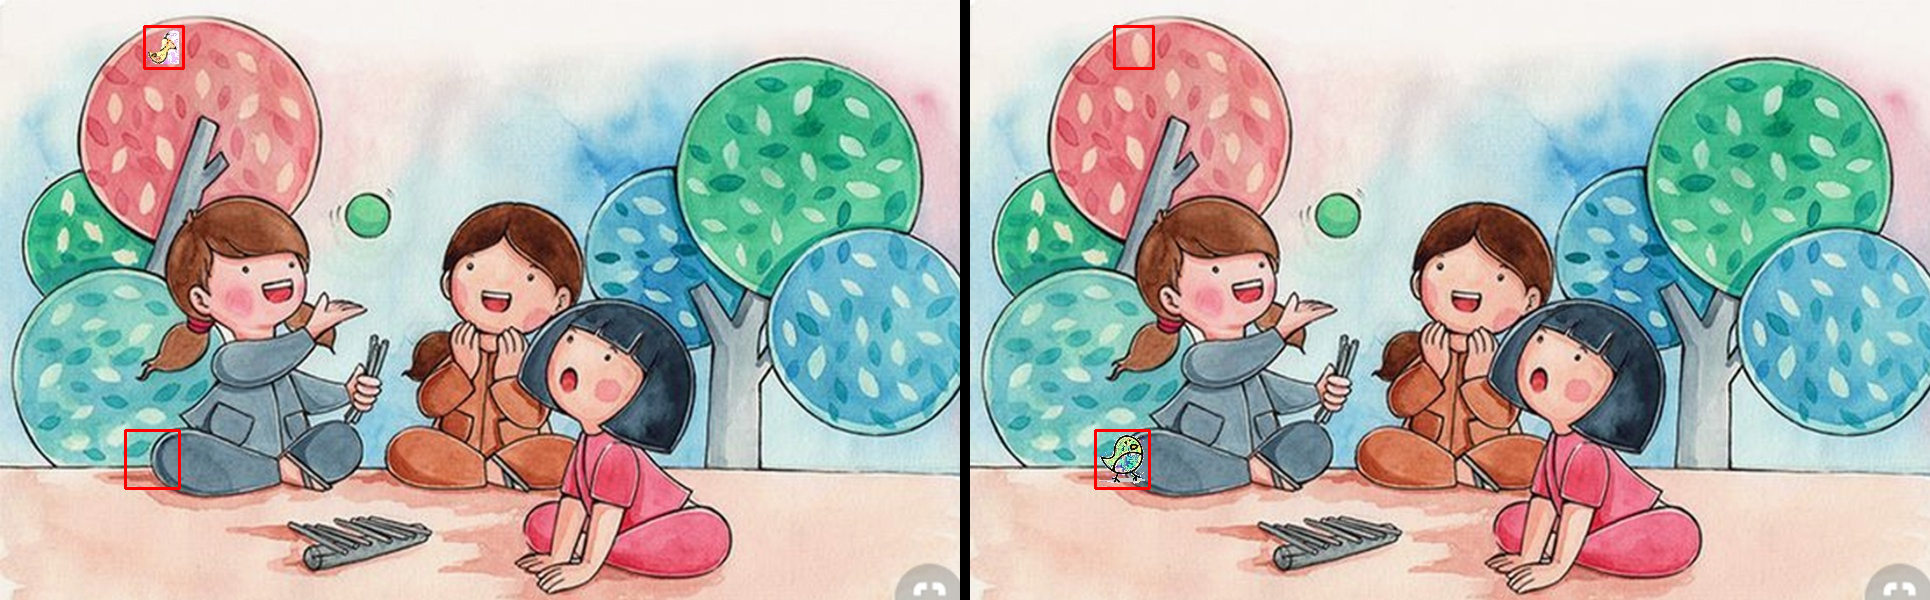

In [73]:
#Có thể thêm các vật thể vào hai ảnh tại hai vị trí khác nhau
x = np.random.randint(img.shape[0] - bird.shape[0])
y = np.random.randint(img.shape[1] - bird.shape[1])

img_test = img.copy()

for channel in range(3):
    for i in range(x, x + bird_scale_rotate.shape[0]):
        for j in range(y, y + bird_scale_rotate.shape[1]):
            if bird[i-x,j-y,channel] < 250:
                img_test[i, j, channel] = bird_scale_rotate[i-x, j -y, channel]

cv2.imwrite('/content/drive/MyDrive/ImageProcessing/img_output.jpg',img_test)

path1 = '/content/drive/MyDrive/ImageProcessing/img_output.jpg'
path2 = '/content/drive/MyDrive/ImageProcessing/img_original.jpg'
spot_the_difference(path1, path2)

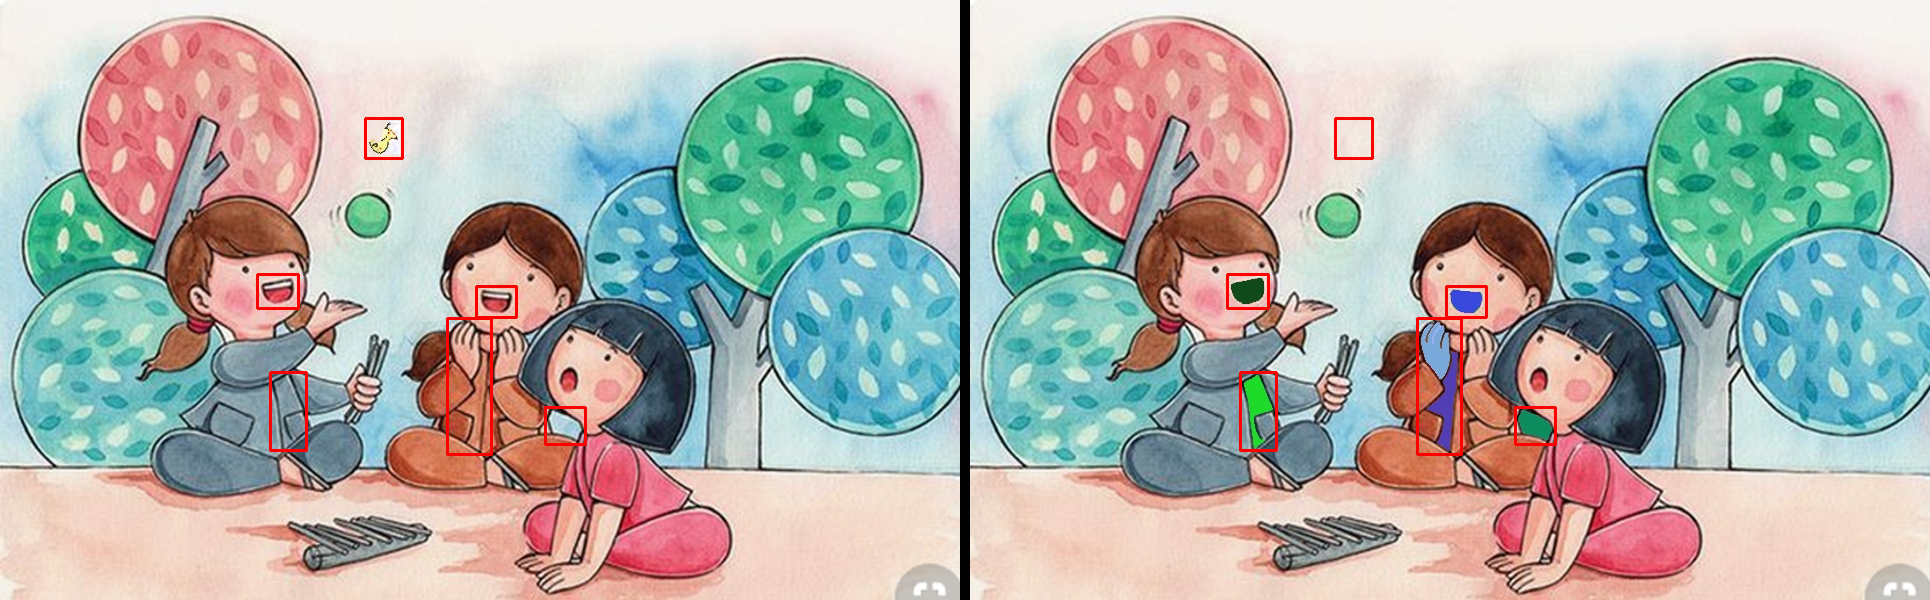

In [74]:
#Mức độ khó hơn có thể vừa thêm vật thể, vừa đổi màu
img_= cv2.imread('/content/drive/MyDrive/ImageProcessing/output_easy.jpg')

x = np.random.randint(img.shape[0] - bird.shape[0])
y = np.random.randint(img.shape[1] - bird.shape[1])

img_test = img.copy()

for channel in range(3):
    for i in range(x, x + bird_scale_rotate.shape[0]):
        for j in range(y, y + bird_scale_rotate.shape[1]):
            if bird[i-x,j-y,channel] < 250:
                img_test[i, j, channel] = bird_scale_rotate[i-x, j -y, channel]

cv2.imwrite('/content/drive/MyDrive/ImageProcessing/img_output.jpg',img_test)

path1 = '/content/drive/MyDrive/ImageProcessing/img_output.jpg'
path2 = '/content/drive/MyDrive/ImageProcessing/output_easy.jpg'
spot_the_difference(path1, path2)